In [5]:
import pandas as pd

# Loading CSV
df = pd.read_csv("weather.csv")

# Converting date column
df['date'] = pd.to_datetime(df['date'], dayfirst=True)



In [6]:
# To Handle missing values  
df.fillna(df.mean(numeric_only=True), inplace=True)

In [7]:
df

,date,temperature,humidity,rainfall
0,2024-01-01,25.0,67,20
1,2024-01-02,18.6,35,20
2,2024-01-03,26.5,87,0
3,2024-01-04,35.2,73,10
4,2024-01-05,17.7,74,0
...,...,...,...,...
361,2024-12-27,35.3,98,0
362,2024-12-28,18.9,49,0
363,2024-12-29,24.0,40,10
364,2024-12-30,26.9,67,10


In [8]:
def hottest_day(df):
    return df.loc[df['temperature'].idxmax()]

def coldest_day(df):
    return df.loc[df['temperature'].idxmin()]

def monthly_avg_temp(df):
    return df.groupby(df['date'].dt.to_period("M"))['temperature'].mean()

def count_rainy_days(df):
    return (df['rainfall'] > 0).sum()

def month_highest_humidity(df):
    return df.groupby(df['date'].dt.month)['humidity'].mean().idxmax()

In [9]:
month_highest_humidity(df)

np.int32(11)

In [11]:
monthly_avg_temp(df)

date
2024-01    17.996774
2024-02    18.948276
2024-03    20.148387
2024-04    20.033333
2024-05    19.019355
2024-06    22.513333
2024-07    21.564516
2024-08    19.751613
2024-09    18.803333
2024-10    20.641935
2024-11    22.663333
2024-12    19.016129
Freq: M, Name: temperature, dtype: float64

In [12]:
!pip install matplotlib

In [13]:
import os
import matplotlib.pyplot as plt


# Making sure 'charts' folder exists
os.makedirs("charts", exist_ok=True)

# saving plot
plt.savefig("charts/temperature_line.png")

os.makedirs("charts", exist_ok=True)
plt.savefig("charts/rainfall_bar.png")


<Figure size 640x480 with 0 Axes>

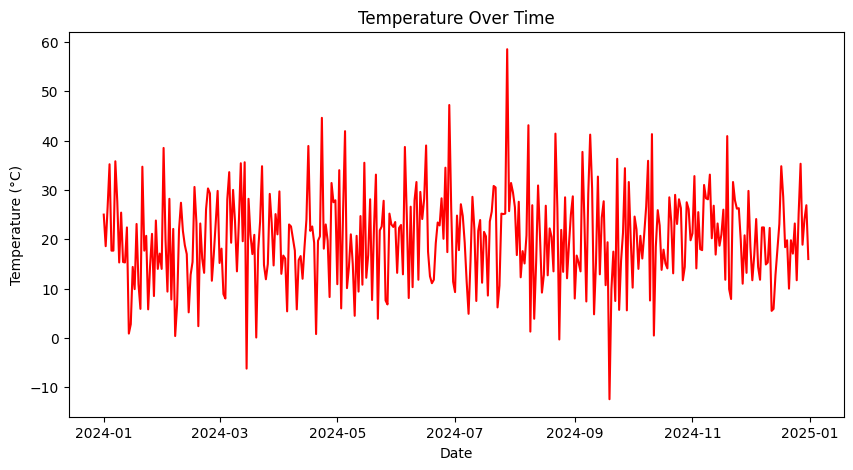

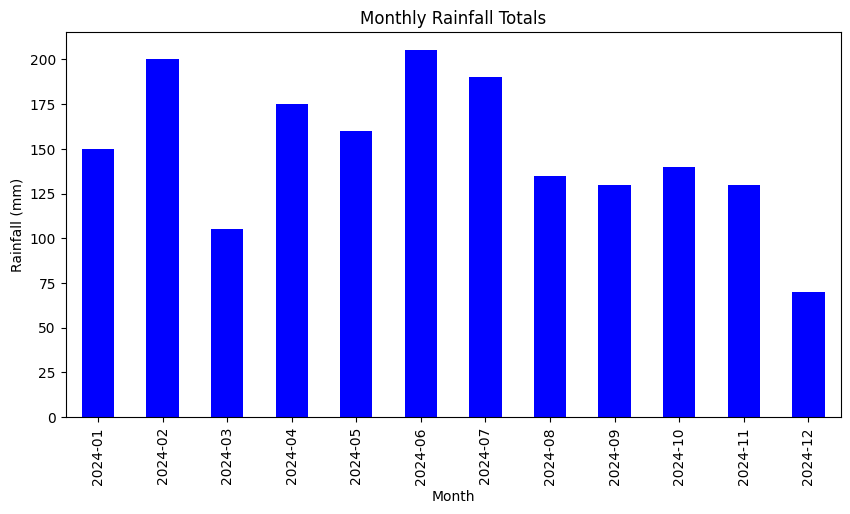

In [14]:
# Temperature line chart
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['temperature'], color='red')
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.savefig("charts/temperature_line.png")
plt.show()   # shows line graph of temperature overtime

# Rainfall bar chart
monthly_rain = df.groupby(df['date'].dt.to_period("M"))['rainfall'].sum()
monthly_rain.plot(kind='bar', color='blue', figsize=(10,5))
plt.title("Monthly Rainfall Totals")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.savefig("charts/rainfall_bar.png")
plt.show()   #shows bar graph of monthly rainfall overtime
